In [3]:
# Source 
# https://www.youtube.com/watch?v=iGWbqhdjf2s

In [1]:
# import libraries
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt 

plt.style.use('fivethirtyeight')

In [2]:
## run locally on gpu
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test), = cifar10.load_data()

In [4]:
# look at datatypes of variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# print shape of array
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
# 50000 rows, 32 x 32 pixels with clor depth 3

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
# look at first image as an array
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

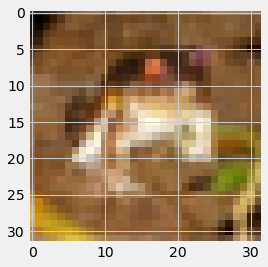

In [7]:
# look at image as picture
img = plt.imshow(x_train[index])

In [8]:
# look at label value
print('The image label is: ', y_train[index])

The image label is:  [6]


In [9]:
# get the label as a name
# for this you need to input the map to the index
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# you need to pass the index of the label value which is position (0) on the list
print('The image classification is: ', classification[y_train[index][0]])

The image classification is:  frog


In [10]:
# convert labels into set of 10 numbers to input into neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
# print the new labels
# this prints a matrix with rows with 10 items, all of which are zero except the one corresponding to the lable which will be one
print(y_train_one_hot)
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
# print new labe of current picture
# the 7th item is frog
print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [13]:
# normalize pixels to values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255
print(x_train[index])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [14]:
# create model´s architecture
model = Sequential()

# add first layer 
# first layer needs an input shape
model.add(Conv2D(32, (5, 5), activation='relu', input_shape = (32, 32, 3)))

# create second layer 
# this is a pooling layer
# gets the max element from the feature maps
model.add(MaxPooling2D(pool_size = (2, 2)))

# add second convolution layer
model.add(Conv2D(32, (5, 5), activation='relu'))

# add second pooling layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# add flattening layer
model.add(Flatten())

#  add layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# add dropout layer with 50% dropout
model.add(Dropout(0.5))

#  add layer with 500 neurons
model.add(Dense(500, activation='relu'))

# add dropout layer with 50% dropout
model.add(Dropout(0.5))

#  add layer with 250 neurons
model.add(Dense(250, activation='relu'))

#  add layer with 10 neurons, 10 is the amount of posible results
model.add(Dense(10, activation='softmax'))

In [15]:
# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
# train the model
hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 11s 13ms/step - loss: 1.7722 - accuracy: 0.3376 - val_loss: 1.4943 - val_accuracy: 0.4536
Epoch 2/10
157/157 [==============================] - 2s 10ms/step - loss: 1.4088 - accuracy: 0.4909 - val_loss: 1.2951 - val_accuracy: 0.5343
Epoch 3/10
157/157 [==============================] - 2s 10ms/step - loss: 1.2635 - accuracy: 0.5433 - val_loss: 1.1990 - val_accuracy: 0.5666
Epoch 4/10
157/157 [==============================] - 2s 11ms/step - loss: 1.1704 - accuracy: 0.5817 - val_loss: 1.2159 - val_accuracy: 0.5662
Epoch 5/10
157/157 [==============================] - 2s 10ms/step - loss: 1.0961 - accuracy: 0.6105 - val_loss: 1.0951 - val_accuracy: 0.6138
Epoch 6/10
157/157 [==============================] - 2s 10ms/step - loss: 1.0084 - accuracy: 0.6427 - val_loss: 1.0240 - val_accuracy: 0.6463
Epoch 7/10
157/157 [==============================] - 2s 10ms/step - loss: 0.9459 - accuracy: 0.6669 - val_loss: 0.9930 - val_accuracy: 0.649

In [17]:
# evaluate the model using test dataset
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.9738 - accuracy: 0.6614


0.6614000201225281

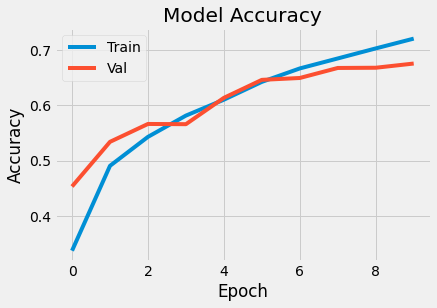

In [18]:
# visualize model´s accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

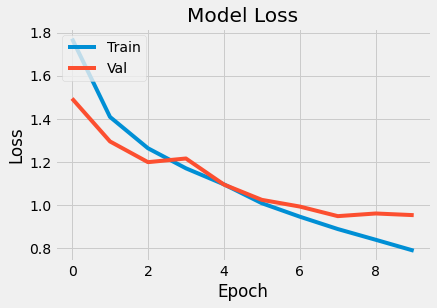

In [19]:
# visualize model´s loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [20]:
# upload image to test
test_image=r'E:\OneDrive\Pictures\2021\cat.jpg'
print(type(test_image))
print(test_image)

<class 'str'>
E:\OneDrive\Pictures\2021\cat.jpg


In [21]:
# print image array to test
import matplotlib.image as mpimg

image_array = mpimg.imread(test_image)
print(image_array)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\OneDrive\\Pictures\\2021\\cat.jpg'

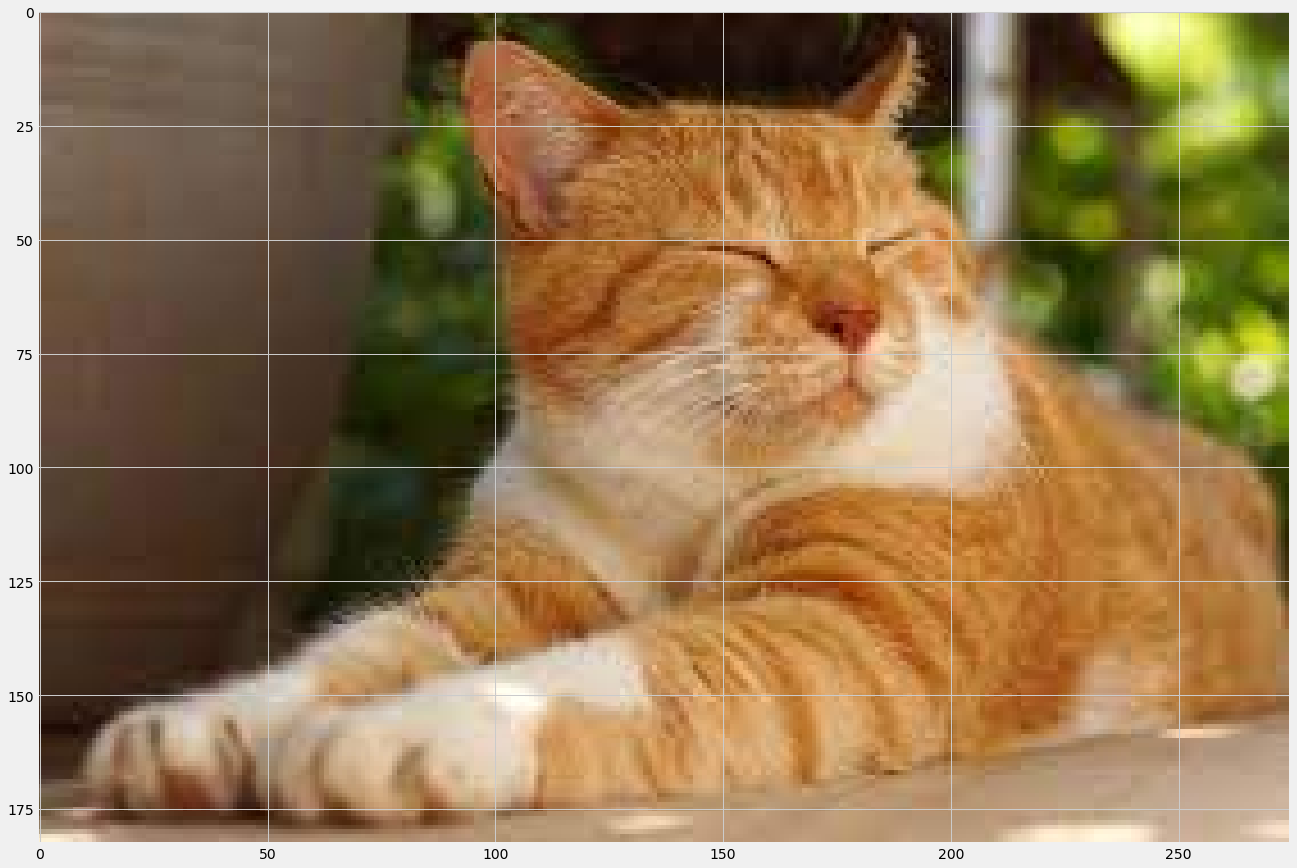

In [28]:
# print image array to test

plt.figure(figsize=(20,20))
plt.imshow(image_array)

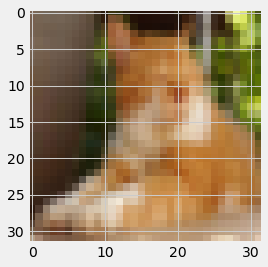

In [31]:
# resize to 32 X 32 depth 3
from skimage.transform import resize

resized_image = resize(image_array, (32, 32, 3))
img = plt.imshow(resized_image)

In [32]:
# get the model prediction
array_to_pass = np.array([resized_image])
predictions = model.predict(array_to_pass)
predictions

array([[9.7276742e-04, 3.5288371e-04, 1.0746973e-02, 4.5799634e-01,
        2.3665732e-02, 4.4776699e-01, 2.3507234e-02, 3.2032933e-02,
        1.4230981e-03, 1.5350775e-03]], dtype=float32)

In [33]:
# sort predictions from greatest to least likely
list_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp 

In [34]:
# show labels in order
print(list_index)

[3, 5, 7, 4, 6, 2, 9, 8, 0, 1]


In [35]:
# show classification
# print first 5 most likely
for i in range(5):
  print(classification[list_index[i]])

cat
dog
horse
deer
frog


In [36]:
# show probability
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 45.8 %
dog : 44.78 %
horse : 3.2 %
deer : 2.37 %
frog : 2.35 %
